***
<a id='beginning'></a> <!--\label{beginning}-->
* [Outline](../0_Introduction/0_introduction.ipynb)
* [Glossary](../0_Introduction/1_glossary.ipynb)
* [4. The Visibility space](4_0_introduction.ipynb)
    * Previous: [4.3 The Visibility Function](4_3_The_Visibility_Function.ipynb)
    * Next: [4.4.2 UV Coverage: The N-element Interferometer](4_4_2_UV_Coverage_The_N-element_Interferometer.ipynb)

***

Main author: Julien Girard

In [1]:
from IPython.core.display import HTML
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
#%matplotlib inline

styles = open("../style/course.css", "r").read()
HTML(styles)

In [2]:
def makecubeplot(u,v,w):
    max_range = np.array([u.max()-u.min(), v.max()-v.min(), w.max()-w.min()]).max()
    Ub = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten() + 0.5*(u.max()+u.min())
    Vb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten() + 0.5*(v.max()+v.min())
    Wb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten() + 0.5*(w.max()+w.min())
    # Comment or uncomment following both lines to test the fake bounding box:
    for ub, vb, wb in zip(Ub, Vb, Wb):
        ax.plot([ub], [vb], [wb], 'w')

---
# Outline

### 4.4.1 UV Tracks

* 4.4.1.A Observing with a baseline in time
    - Variation of the projected baseline
    - Motion in the (u,v) plane
    - e.g. Earth rotation: the baseline as seen from the source
    

* 4.4.1.B Shape of the tracks
    - dependence of baseline length
    - Latitude of observation
    - General case (tracks are ellipsis)
    - parameters of the ellipsis
    
    
* 4.4.1.C Special cases
    - East-West array
    - Polar interferometer (tracks are circle)
    - Equatorial interferometer (tracks are straight lines)


---

---

---


<p class=conclusion>
  <font size=4> **Important things to remember**</font>
  <br>
  <br>
  
&bull; *The measured spatial frequency depends on the length of the **projected** baseline* <br><br>
&bull; *The measured spatial frequency depends on the length of the **projected** baseline*
</p>

### 4.4.1.A The projected baseline with time

    - Variation of the projected baseline
    - Motion in the (u,v) plane
    - e.g. Earth rotation: the baseline as seen from the source
    

In section 4.1, we linked the equatorial coordinates of the baseline to the ($u$,$v$,$w$) space through the transformation matrix:
\begin{equation}
\begin{pmatrix}
u\\
v\\
w
\end{pmatrix}
=
\frac{1}{\lambda}
\begin{pmatrix}
\sin H_0 & \cos H_0 & 0\\ 
-\sin \delta_0 \cos H_0 & \sin\delta_0\sin H_0 & \cos\delta_0\\
\cos \delta_0 \cos H_0 & -\cos\delta_0\sin H_0 & \sin\delta_0\\
\end{pmatrix} 
\begin{pmatrix}
X\\
Y\\
Z
\end{pmatrix}
\end{equation}

Let Ant$_1$ and Ant$_2$ two antennas:

\begin{equation}
\begin{bmatrix}
X\\
Y\\
Z
\end{bmatrix}
=|\mathbf{b}|
\begin{bmatrix}
\cos L_a \sin E - \sin L_a \cos E \cos A\nonumber\\ 
\cos E \sin A \nonumber\\
\sin L_a \sin E + \cos L_a \cos E \cos A\\
\end{bmatrix}
\end{equation}


In [3]:
ant1 = np.array([-500e3,500e3,0])
ant2 = np.array([500e3,-500e3,+10])

Let's express the baseline in ENU coordinates:

In [4]:
b_ENU = ant2-ant1
D = np.sqrt(np.sum((b_ENU)**2))
print str(D/1000)+" km"

1414.21356241 km


Latitude of the interferometer: $L_a=+45^\circ00'00''$

In [5]:
L = (np.pi/180)*(45+0./60+0./3600)      # Latitude

** Expression of $\mathcal{b}$ in ($A$,$E$) and in the ($X$,$Y$,$Z$) systems**

In [6]:
A=np.arctan2(b_ENU[0],b_ENU[1])
print "Baseline Azimuth="+str(np.degrees(A))+"°"

E=np.arcsin(b_ENU[2]/D)
print "Baseline Elevation="+str(np.degrees(E))+"°"

Baseline Azimuth=135.0°
Baseline Elevation=0.000405142342264°


In [13]:
%matplotlib
# Create a sphere
r = 6371 #km
pi = np.pi
cos = np.cos
sin = np.sin
phi, theta = np.mgrid[0.0:pi:100j, 0.0:2.0*pi:100j]
x = r*sin(phi)*cos(theta)
y = r*sin(phi)*sin(theta)
z = r*cos(phi)

# coordinate center baseline
r0=r
#L=np.radians(45.)
phi0=np.pi/2-L
theta0=0.

x0 = r0*sin(phi0)*cos(theta0)
y0 = r0*sin(phi0)*sin(theta0)
z0 = r0*cos(phi0)

b=D/1e3 #km

#E=np.radians(0)
#A=np.radians(90)

rant1=r+ant1[2]
rant2=r+ant2[2]

ant1phi=phi0+np.arctan(b/2*cos(A)/r)
ant2phi=phi0-np.arctan(b/2*cos(A)/r)

ant1theta=theta0+np.arctan(b/2*sin(A)/r)
ant2theta=theta0-np.arctan(b/2*sin(A)/r)

xant1=rant1*sin(ant1phi)*cos(ant1theta)
xant2=rant2*sin(ant2phi)*cos(ant2theta)

yant1=rant1*sin(ant1phi)*sin(ant1theta)
yant2=rant2*sin(ant2phi)*sin(ant2theta)

zant1=rant1*cos(ant1phi)
zant2=rant2*cos(ant2phi)

#Import data
#data = np.genfromtxt('leb.txt')
#xx, yy, zz = np.hsplit(data, 3) 

#Set colours and render
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.set_title("Baseline seen from the source")
x = r*sin(phi)*cos(theta)
y = r*sin(phi)*sin(theta)
z = r*cos(phi)

ax.plot_surface(x, y, z,  rstride=4, cstride=4, color='k',alpha=0.02, linewidth=1,shade=False)

ax.plot_surface(x, y, z*0,  rstride=40, cstride=40, color='c', alpha=0.1, linewidth=0,shade=False)

#ax.plot_surface(x, y, z,  rstride=3, cstride=3, color='w', alpha=0.3, linewidth=0)
#ax.plot_wireframe(x, y, z,  rstride=10, cstride=10, color='k', alpha=1, linewidth=0)

ax.scatter(x0,y0,z0,color="k",s=5)
ax.scatter(xant1,yant1,zant1,color="b",s=20)
ax.scatter(xant2,yant2,zant2,color="b",s=20)
ax.plot([xant1,xant2],[yant1,yant2],[zant1,zant2],color="g",linewidth=2)

ax.plot([0,0],[0,0],[-7000,7000.],'k')
ax.plot([0,0],[-7000,7000.],[0,0],'k')
ax.plot([-7000,7000.],[0,0],[0,0],'k')

ax.plot([0,x0],[0,y0],[0,z0],'r',linewidth=2)

ax.view_init(30,50)
ax.set_xlim([-7000,7000])
ax.set_ylim([-7000,7000])
ax.set_zlim([-7000,7000])
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_zlabel("Z (km)")
ax.set_aspect("equal")
plt.tight_layout()
#plt.show()

Using matplotlib backend: TkAgg


### 4.4.1.B Shape of the tracks

**Observation parameters**

Latitude of the baseline: $L_a=-30^\circ43'17.34''$

Declination of the observation: $\delta=-74^\circ39'37.481''$

Duration of observation: $\Delta \text{HA}=[-4^\text{h},4^\text{h}]$

Time steps: 600

Frequency: 1420 MHz

    - dependence of baseline length
    - Latitude of observation
    - General case (tracks are ellipsis)
    - parameters of the ellipsis

In [8]:
%matplotlib
# Observation parameters
c=3e8                                         # Speed of light
f=1420e9                                      # Frequency
lam = c/f                                     # Wavelength 
#dec = (np.pi/180)*(-74-39.0/60-37.481/3600)   # Declination
dec = (np.pi/180)*(-30-43.0/60-17.34/3600)   # Declination

time_steps = 600                              # time steps
h = np.linspace(-4,4,num=time_steps)*np.pi/12 # Hour angle window

Using matplotlib backend: TkAgg


In [9]:
ant1 = np.array([25.095,-9.095,0.045])
ant2 = np.array([90.284,26.380,-0.226])
b_ENU = ant2-ant1
D = np.sqrt(np.sum((b_ENU)**2))
L = (np.pi/180)*(-30-43.0/60-17.34/3600)

A=np.arctan2(b_ENU[0],b_ENU[1])
print A*(180/np.pi)
E=np.arcsin(b_ENU[2]/D)
print E*(180/np.pi)

X = D*(np.cos(L)*np.sin(E)-np.sin(L)*np.cos(E)*np.cos(A))
Y = D*np.cos(E)*np.sin(A)
Z = D*(np.sin(L)*np.sin(E)+np.cos(L)*np.cos(E)*np.cos(A))

61.4455465958
-0.209213555573


** Computation of the projected baselines in ($u$,$v$,$w$) coordinates along the observing time**

As the $u$, $v$, $w$ coordinates depends explicitely on $H$, we must evaluate them for each time step of the observation.

$\lambda u = X \sin H + Y \cos H$

$\lambda v= -X \sin \delta \cos H + Y \sin\delta\sin H + Z \cos\delta$

$\lambda w= X \cos \delta \cos H -Y \cos\delta\sin H + Z \sin\delta$

In [10]:
u = lam**(-1)*(np.sin(h)*X+np.cos(h)*Y)/1e3
v = lam**(-1)*(-np.sin(dec)*np.cos(h)*X+np.sin(dec)*np.sin(h)*Y+np.cos(dec)*Z)/1e3
w = lam**(-1)*(np.cos(dec)*np.cos(h)*X-np.cos(dec)*np.sin(h)*Y+np.sin(dec)*Z)/1e3

The $uvw$-track of the baseline over the 8 hour observation period.

In [11]:

fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.plot(u,v,w,'b')
ax.plot(-u,-v,-w,'r')

ax.set_xlabel("u (klambda)")
ax.set_ylabel("v (klambda)")
ax.set_zlabel("w (klambda)")
ax.plot(u,v,'b--',zdir='w',zs=w.min())
ax.plot(-u,-v,'r--',zdir='w',zs=w.min())

#plt.plot(u,v)
#plt.hold('on')
#plt.plot(u[0],v[0],"ro")
#plt.plot(u[-1],v[-1],"ko")
#plt.plot(-u,-v,"r")
#plt.show()

The $uv$-track projected in the $uv$ plane.

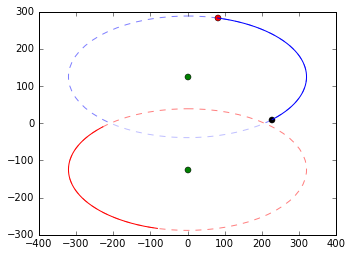

In [12]:
#fig=plt.figure()
#fig.add_subplot(111,aspect='auto')
%matplotlib inline
from matplotlib.patches import Ellipse


a=np.sqrt(X**2+Y**2)/lam/1e3
b=a*np.sin(dec)
v0=Z/lam*np.cos(dec)/1e3

e1=Ellipse(xy=np.array([0,v0]),width=2*a,height=2*b,angle=0)

e2=Ellipse(xy=np.array([0,-v0]),width=2*a,height=2*b,angle=0)


fig=plt.figure(0)
ax=fig.add_subplot(111,aspect="equal")
        
ax.plot([0],[v0],"go")
ax.plot([0],[-v0],"go")
ax.plot(u[0],v[0],"ro")
ax.plot(u[-1],v[-1],"ko")
ax.plot(-u,-v,"r")

ax.add_artist(e1)
e1.set_lw(1)
e1.set_ls("--")
e1.set_facecolor("w")
e1.set_edgecolor("b")
e1.set_alpha(0.5)

ax.add_artist(e2)
e2.set_lw(1)
e2.set_ls("--")
e2.set_facecolor("w")
e2.set_edgecolor("r")
e2.set_alpha(0.5)

ax.plot(u,v)
ax.hold('on')
#uu=np.linspace(-315,315,100)
#vv=np.sqrt(b**2*(1-(uu/a)**2))+v0
#vv2=-np.sqrt(b**2*(1-(uu/a)**2))+v0
#plt.plot(uu,vv,"k--")
#plt.plot(uu,vv2,"k--")
#plt.show()


The blue (resp. the red) curve is the $uv$ track of the baseline $\mathbf{b}_{12} (resp. \mathbf{b}_{21}$). As $I_\nu$ is real, the real part of $V$ is even and the imaginary part if odd making $V(-u,-v)=V^*$. It implies that one baseline provide a measurement of its complex conjugate for free at (-u,-v).

One can note that in this particular case, the $uv$ tracks draw an ellipsis.
This can be easily derived from the combination of the equation of $u$ and $v$:


$$\boxed{u^2 + \left[ \frac{v -\frac{Z}{\lambda} \cos \delta}{\sin \delta} \right]^2 = \left[ \frac{X}{\lambda} \right]^2 + \left[ \frac{Y}{\lambda} \right]^2}$$

This is the equation of an ellipse centered at $(0,\frac{Z}{\lambda} \cos \delta)$ in the ($u$,$v$) plane, with a major axis of 

$a=\frac{\sqrt{X^2 + Y^2}}{\lambda}$. The minor axis along the axis $v$ will be a function of $Z$, $\delta$ and $a$.

(Derivation in Appendix A.3 [EXREF])

In [ ]:
v0=Z/lam*np.cos(dec)/1e3
a=np.sqrt(X**2+Y**2)/lam/1e3
b=a

print v0,a
uu=np.linspace(-300,300,100)
vv=np.sqrt(b**2*(1-(uu/a)**2))

vv
np.degrees(dec)

### 4.4.1.C Special cases

    - East-West array
    - Polar interferometer (tracks are circle)
    - Equatorial interferometer (tracks are straight lines)


### The particular case of the East-West baseline (2-elements interferometer OR Section 3 UV space)

Note: all uvtracks are contained in a plane (no need for W-projection, but just a correction between the $uv$ plane and the $XY$ plane

####  In the Equatorial $XYZ$ space

If the baseline is aligned with the East-West direction, then the Elevation $E$ of the baseline is zero and the Azimuth $A$ is $\frac{\pi}{2}$. Equation A simplifies as follow:

\begin{equation}
\frac{1}{\lambda}
\begin{bmatrix}
X\\
Y\\
Z
\end{bmatrix}
=
|\mathbf{b_\lambda}|
\begin{bmatrix}
\cos L_a \sin 0 - \sin L_a \cos 0 \cos \frac{\pi}{2}\nonumber\\ 
\cos 0 \sin \frac{\pi}{2} \nonumber\\
\sin L_a \sin 0 + \cos L_a \cos 0 \cos \frac{\pi}{2}\\
\end{bmatrix}
=
\begin{bmatrix}
0\\
|\mathbf{b_\lambda}|\\
0 \\
\end{bmatrix}
\end{equation}

This relation does not contains $H$

#### In the $uvw$ space

If we observe a source at declination $\delta_0$ but with varying Hour Angle, $H$, we will have the following relation:

\begin{equation}
\begin{pmatrix}
u\\
v\\
\end{pmatrix}
=
\begin{pmatrix}
\sin H & \cos H & 0\\ 
-\sin \delta_0 \cos H & \sin\delta_0\sin H & \cos\delta_0\\
\end{pmatrix} 
\begin{pmatrix}
0\\
|\mathbf{b_\lambda}| \\
0
\end{pmatrix}
\end{equation}

\begin{equation}
\begin{pmatrix}
u\\
v\\
\end{pmatrix}
=
\begin{pmatrix}
|\mathbf{b_\lambda}| \cos H \\ 
|\mathbf{b_\lambda}| \sin\delta_0 \sin H\\
\end{pmatrix} 
\end{equation}

when $H = 6^\text{h}$ (West)

\begin{equation}
\begin{pmatrix}
u\\
v\\
\end{pmatrix}
=
\begin{pmatrix}
0 \\ 
|\mathbf{b_\lambda}|\sin\delta_0\\
\end{pmatrix} 
\end{equation}

when $H = 0^\text{h}$ (South)
\begin{equation}
\begin{pmatrix}
u\\
v\\
\end{pmatrix}
=
\begin{pmatrix}
|\mathbf{b_\lambda}| \\ 
0\\
\end{pmatrix} 
\end{equation}

when $H = -6^\text{h}$ (East)

\begin{equation}
\begin{pmatrix}
u\\
v\\
\end{pmatrix}
=
\begin{pmatrix}
0 \\ 
-|\mathbf{b_\lambda}|\sin\delta_0\\
\end{pmatrix} 
\end{equation}

In this case, one case notice that we always have a relationship between $u$, $v$ and $|\mathbf{b_\lambda}|$:

$$ u^2+\left( \frac{v}{\sin\delta_0}\right) ^2=|\mathbf{b}|^2$$ 

<div class=warn>
**Warning:** the $\sin\delta_0$ factor appearing in Eq., can be interpreted as a compression factor.
</div>

We will come back to it in Section (UVspace) [EXREF]

####  From $lmn$ to ($\alpha$, $\delta$)

<div class=advice>
**Note:** The complete derivation of Eq. A from the spherical triangle **ZSSc** can be found in Appendix A.2 [INREF]
</div>

The quantity $\text{b}_\text{proj}$, namely the **projected baseline** is the module of the projection of the physical baseline *as seen* from direction $\mathbf{s}$. It can be defined as a difference of OPDs and **depends on** the choice of the phase center.

* ($x, y, z$) - Cartesian coordinates
* ($\rho,\theta,\varphi$) - Spherical coordinates
* ($l,m$, $n$) - Direction Cosines
* ($X,Y$, $Z$) - Equatorial Coordinate Reference Frame (Baselines)
* ($u,v$, $w$) - Visibility Coordinate System


* $\mathbf{\hat{e}_x},\mathbf{\hat{e}_y},\mathbf{\hat{e}_z}$ - Basis for cartesian
* $\mathbf{\hat{e}_{\rho}},\mathbf{\hat{e}_{\theta}},\mathbf{\hat{e}_{\varphi}}$ - Basis for spherical
* $\mathbf{\hat{e}_X},\mathbf{\hat{e}_Y},\mathbf{\hat{e}_Z}$ - Basis for equatorial XYZ
* $\mathbf{\hat{e}_u},\mathbf{\hat{e}_v},\mathbf{\hat{e}_w}$ - Basis for uvw
* $\mathbf{\hat{e}_l},\mathbf{\hat{e}_m},\mathbf{\hat{e}_n}$ - Basis for lmn

---
* [Go back up](#beginning) <!--\ref{beginning}--> 
* Or continue to next section: [4.4.2 UV Coverage: The N-element Interferometer -->](4_4_2_UV_Coverage_The_N-element_Interferometer.ipynb)
---